In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import numpy as np
import trueq as tq
import trueq.math as tqm
import trueq.simulation as tqs

# define the cycle to benchmark using KNR
cycle_of_interest = tq.Cycle({(0, 1): tq.Gate.cx, 2: tq.Gate.z})

In [3]:
# define some simple 3-qubit errors, together with their probability
error_profile = {
    #  no error with prob 88%
    "III": 0.88,
    # IXI error with prob  1%
    "IXI": 0.01,
    # XII error with prob  3%
    "XII": 0.03,
    # IXX error with prob  6%
    "IXX": 0.06,
    # ZXZ error with prob  2%
    "ZXZ": 0.02,
}

# define Kraus operators based on the above error profile
kraus_list = [
    np.sqrt(prob) * tqm.Weyls(pauli, dim=2).herm_mat
    for pauli, prob in error_profile.items()
]

# instantiate a superoperator based on the Kraus operators
superop = tqm.Superop.from_kraus(kraus_list)

# instantiate a device simulator based on the above error profile
device = tqs.Simulator()
device.add_cycle_noise(
    # the 3-qubit error map is applied to qubits 0, 1, and 2
    {(0, 1, 2): superop},
    # the error map is only applied to the cycle of interest
    match=tqs.CycleMatch(cycle_of_interest),
    # the error map occurs before the cycle of interest
    cycle_offset=-1,
)

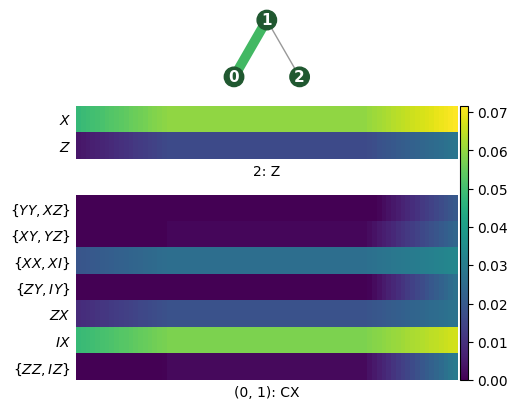

In [4]:
# generate KNR circuits to benchmark the cycle, targeting only single gate supports
knr_circuits_1 = tq.make_knr(
    cycle_of_interest, n_random_cycles=[4, 10], n_circuits=30, subsystems=1
)

# run the circuits on the device
device.run(knr_circuits_1)

# plot the reconstructed error profile with subsystems=1:
layout = tq.visualization.Graph.linear(3, show_labels=True)  # specify the chip layout
knr_circuits_1.plot.knr_heatmap(layout)  # plot the heatmap

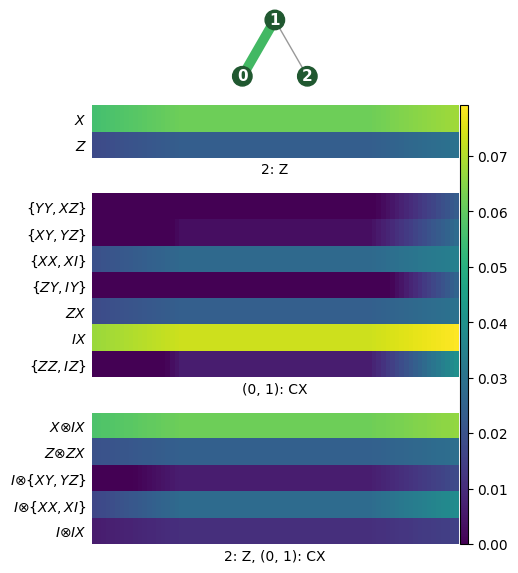

In [5]:
# generate KNR circuits to benchmark the cycle, targeting all pairs of gate supports
knr_circuits_2 = tq.make_knr(
    cycle_of_interest, n_random_cycles=[4, 10], n_circuits=30, subsystems=2
)

# run the circuits on the device
device.run(knr_circuits_2)

# plot the reconstructed error profile with subsystems=2:
knr_circuits_2.plot.knr_heatmap(layout)  # plot the heatmap

In [6]:
# define the cycle of interest to benchmark
cycle_of_interest = tq.Cycle({range(5): tq.Gate.x})

# define the layout of our device
layout = tq.visualization.Graph.linear(5, show_labels=True)

# define the ZZ couplings in our device
error_profile = {
    "IIIII": 0.90,
    "ZZIII": 0.02,
    "IZZII": 0.01,
    "IIZZI": 0.03,
    "IIIZZ": 0.04,
}

kraus_list = [
    np.sqrt(prob) * tqm.Weyls(pauli, dim=2).herm_mat
    for pauli, prob in error_profile.items()
]

# instantiate a superoperator based on the Kraus operators
superop = tqm.Superop.from_kraus(kraus_list)

# instantiate a device simulator based on the above error profile
device = tqs.Simulator()
device.add_cycle_noise(
    {(0, 1, 2, 3, 4): superop},
    match=tqs.CycleMatch(cycle_of_interest),
    cycle_offset=-1,
)

# use from_cycle and nearest_neighbour methods to create subsystems to analyze
subsystems = tq.Subsystems.from_cycle(cycle_of_interest).nearest_neighbour(layout)
subsystems

Subsystems(((0,), (1,), (2,), (3,), (4,), (0, 1), (1, 2), (2, 3), (3, 4)))

540

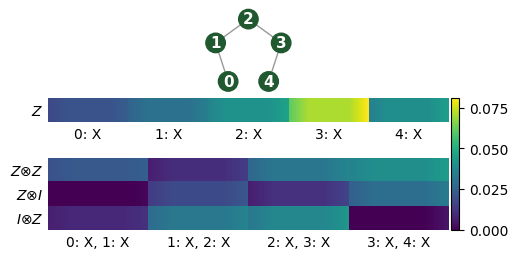

In [7]:
knr_circuits_1 = tq.make_knr(
    cycle_of_interest, n_random_cycles=[4, 10], n_circuits=30, subsystems=subsystems
)
device.run(knr_circuits_1)

# plot the reconstructed error profile on the specified subsystems:
knr_circuits_1.plot.knr_heatmap(layout)

# print the total number of circuits
knr_circuits_1.n_circuits

1200

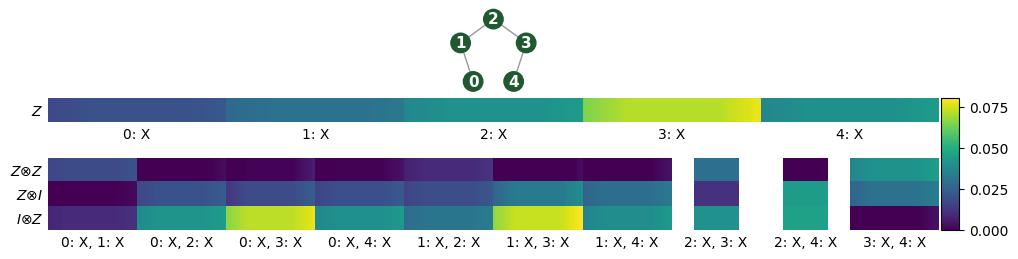

In [8]:
knr_circuits_2 = tq.make_knr(
    cycle_of_interest, n_random_cycles=[4, 10], n_circuits=30, subsystems=2
)
device.run(knr_circuits_2)

# plot the reconstructed error profile with subsystems=2:
knr_circuits_2.plot.knr_heatmap(layout)

# print the total number of circuits
knr_circuits_2.n_circuits

In [9]:
# setting the register dimension to 3 (i.e. qutrits)
tq.settings.set_dim(3)

# define the cycle to benchmark using KNR
cycle_of_interest = {(0, 1): tq.Gate.cx3}

# define some simple error profile by pairing Weyl errors with corresponding
# probabilities
error_profile = {
    #  no error with prob 88%
    "W00W00": 0.88,
    # X3.I3 error with prob  2%
    "W10W00": 0.02,
    # X3.Z3 error with prob  8%
    "W10W01": 0.08,
    # I3.X3 error with prob  2%
    "W00W10": 0.02,
}

# define Kraus operators based on the above error profile
kraus_list = [
    np.sqrt(prob) * tqm.Weyls(weyl).mat for weyl, prob in error_profile.items()
]

# instantiate a superoperator based on the Kraus operators
superop = tqm.Superop.from_kraus(kraus_list)

# instantiate a device simulator based on the above error profile
device = tqs.Simulator()
device.add_cycle_noise(
    # the 3-qutrit error map is applied to qutrits 0, 1, and 2
    {(0, 1): superop},
    # the error map is only applied to the cycle of interest
    match=tqs.CycleMatch(cycle_of_interest),
    # the error map occurs before the cycle of interest
    cycle_offset=-1,
)

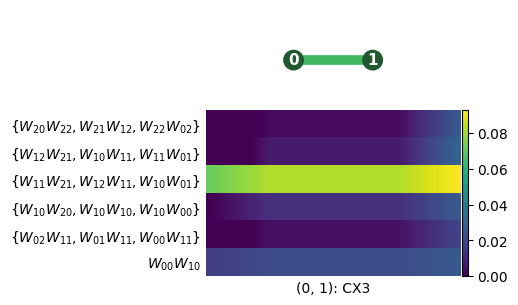

In [10]:
# generate KNR circuits to benchmark the cycle, targeting only single gate supports
knr_circuits = tq.make_knr(
    cycle_of_interest, n_random_cycles=[6, 9, 12], n_circuits=30, subsystems=1
)

# run the circuits on the device
device.run(knr_circuits)

# plot the reconstructed error profile with subsystems=1:
layout = tq.visualization.Graph.linear(2, show_labels=True)  # specify the chip layout
knr_circuits.plot.knr_heatmap(layout)  # plot the heatmap

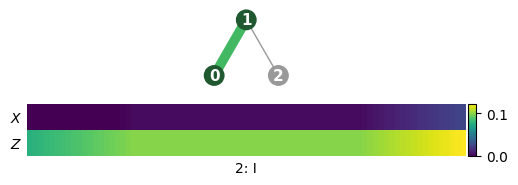

In [11]:
tq.settings.set_dim(2)

cycle_of_interest = tq.Cycle({(0, 1): tq.Gate.cx})

twirl = tq.Twirl("P", (0, 1, 2))

circuits = tq.make_knr(
    cycle_of_interest, twirl=twirl, n_random_cycles=[4, 10], n_circuits=30, subsystems=1
)

sim = tq.Simulator().add_stochastic_pauli(pz=0.1, match=tq.simulation.LabelMatch(2))

sim.run(circuits)

layout = tq.visualization.Graph.linear(3, show_labels=True)
circuits.plot.knr_heatmap(layout)

In [12]:
circuits.fit()

EstimateCollection(2)